#Data Exploration

This Notebook contains all data exploration to do with Katey Diniz's Final Project in DATA 301 - Winter 2021 with Dr. Bodwin. 

**Table of Contents:**

>[Data Exploration](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=sG_NjC6nywfd)

>>[What has yield looked in the the past?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=6846tCZ26vtW)

>>[What is the difference in acreage in df_area_grown(Census data) and df_area_planted(Survey data)?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=v4X8832cyz0z)

>>[What kind of operations grow Strawberries in California?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=BQJJ7JuQNCmz)

>>[What are the most used chemical applications in Strawberry Fields in California?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=-HF3ldF20snt)

>>[What is the climate like in the Top Producing County (Monterey) for Strawberries?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=9wmlaDnUF6Px)

>>>[Time Series Linear Regression](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=nWrLQYHYX7qY)

>>[Where did the weather data come from?](#folderId=19mt8On6j1WP48ULOD6uFTOuikptDfSb1&updateTitle=true&scrollTo=baBXB6S4Eu3l)



In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df_area_grown = pd.read_csv("https://www.dropbox.com/s/5dcdmitmmpo5xkz/df_area_grown.csv?dl=1")
df_area_planted = pd.read_csv("https://www.dropbox.com/s/2zb1l0xm9mv7my7/df_area_planted.csv?dl=1")
df_appplications = pd.read_csv("https://www.dropbox.com/s/xaqt8v0ihpn57w3/df_applications.csv?dl=1")
df_irrigation = pd.read_csv("https://www.dropbox.com/s/9bo2z3acudg4801/df_irrigation.csv?dl=1")
df_Monterey = pd.read_csv("https://www.dropbox.com/s/lexay02c3ijcz6c/df_Monterey.csv?dl=1")
df_SantaCruz = pd.read_csv("https://www.dropbox.com/s/sgmdu3nabaqm4xw/df_SantaCruz.csv?dl=1")
df_SB = pd.read_csv("https://www.dropbox.com/s/x7usc7t360hjq1j/df_SB.csv?dl=1")
df_SLO = pd.read_csv("https://www.dropbox.com/s/85qvvq9bvm0je2j/df_SLO.csv?dl=1")
df_Ventura = pd.read_csv("https://www.dropbox.com/s/0fp2wse2ftj55kf/df_Ventura.csv?dl=1")
df_weather = pd.read_csv("https://www.dropbox.com/s/zgk8q4qk2p2d91r/df_weather.csv?dl=1")
df_yield = pd.read_csv("https://www.dropbox.com/s/7n0t5cmkkbsrshy/df_yield.csv?dl=1")

##What has yield looked in the the past?

Text(0, 0.5, 'CWT/ACRE')

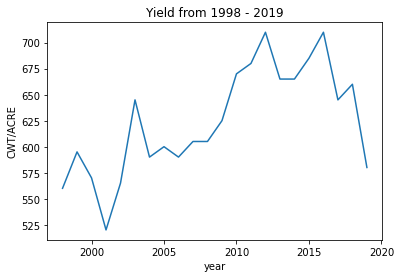

In [87]:
df_yield_notForcast = df_yield[(df_yield['short_desc'] == "STRAWBERRIES - YIELD, MEASURED IN CWT / ACRE") & (df_yield['reference_period_desc'] == "YEAR")]
df_yield_notForcast.plot(x="year", y="Value", legend=False)
plt.title("Yield from 1998 - 2019")
plt.ylabel("CWT/ACRE")

##What is the difference in acreage in df_area_grown(Census data) and df_area_planted(Survey data)?

In [88]:
df_area_grown_grabbed = df_area_grown[df_area_grown["domain_desc"] == "AREA GROWN"]
df_area_planted_grabbed = df_area_planted[df_area_planted["reference_period_desc"] == "YEAR"]
df_area_planted_grabbed["year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [89]:
df_area_grown_grabbed["year"].unique()

array([2017, 2012, 2007])

In [90]:
df_area_planted_grabbed_2017 = df_area_planted[df_area_planted["year"] == 2017]
df_area_planted_grabbed_2012 = df_area_planted[df_area_planted["year"] == 2012]
df_area_planted_grabbed_2007 = df_area_planted[df_area_planted["year"] == 2007]
AP2017 = df_area_planted_grabbed_2017["Value"].sum()
AP2012 = df_area_planted_grabbed_2012["Value"].sum()
AP2007 = df_area_planted_grabbed_2007["Value"].sum()

In [91]:
df_area_grown_grabbed_2017 = df_area_grown_grabbed[df_area_grown_grabbed["year"] == 2017]
df_area_grown_grabbed_2012 = df_area_grown_grabbed[df_area_grown_grabbed["year"] == 2012]
df_area_grown_grabbed_2007 = df_area_grown_grabbed[df_area_grown_grabbed["year"] == 2007]
AG2017 = df_area_grown_grabbed_2017.Value.sum()
AG2012 = df_area_grown_grabbed_2012.Value.sum()
AG2007 = df_area_grown_grabbed_2007.Value.sum()

Text(0.5, 1.0, 'Area Grown vs. Area Planted')

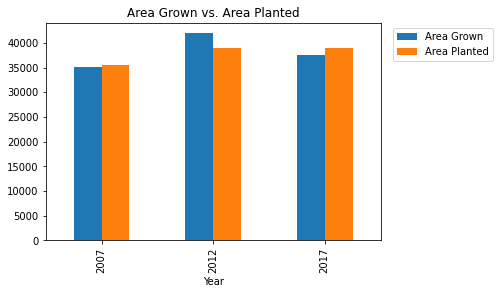

In [92]:
df_compare = pd.DataFrame(data={"Year": [2007, 2012, 2017],"Area Grown": [AG2007, AG2012, AG2017], "Area Planted": [AP2007, AP2012, AP2017]})
df_compare.set_index("Year")
df_compare.plot.bar(x="Year")
plt.legend(bbox_to_anchor=(0.85, 0.5, 0.5, 0.5))
plt.title("Area Grown vs. Area Planted")

##What kind of operations grow Strawberries in California?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'County Name')

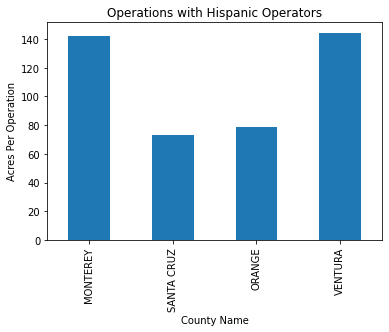

In [93]:
df_area_grown_operations = df_area_grown[df_area_grown['domain_desc'] == "OPERATORS"]
df_area_grown_operations_Hispanic = df_area_grown_operations[df_area_grown_operations['domaincat_desc'] == "OPERATORS: (ETHNICITY = HISPANIC)"]
df_area_grown_operations_Hispanic_operations = df_area_grown_operations_Hispanic[df_area_grown_operations_Hispanic['unit_desc'] == "OPERATIONS"]
df_area_grown_operations_Hispanic_acres = df_area_grown_operations_Hispanic[df_area_grown_operations_Hispanic['unit_desc'] == "ACRES"]
df_area_grown_operations_Hispanic_operations_list = df_area_grown_operations_Hispanic_operations["Value"].to_list()
df_area_grown_operations_Hispanic_acres_list = df_area_grown_operations_Hispanic_acres["Value"].to_list()
dividedby = []
for x in range(4):
  dividedby.append(df_area_grown_operations_Hispanic_acres_list[x]/df_area_grown_operations_Hispanic_operations_list[x])
df_area_grown_operations_Hispanic_operations["dividedby"] = dividedby
df_area_grown_operations_Hispanic_operations.plot.bar(x="county_name", y="dividedby", legend=False)
plt.title("Operations with Hispanic Operators")
plt.ylabel("Acres Per Operation")
plt.xlabel("County Name")

In [94]:
df_area_grown_operations['domaincat_desc'].unique()

array(['OPERATORS: (ETHNICITY = HISPANIC)',
       'OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER RACES)',
       'OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER RACES)'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 0, 'County Name')

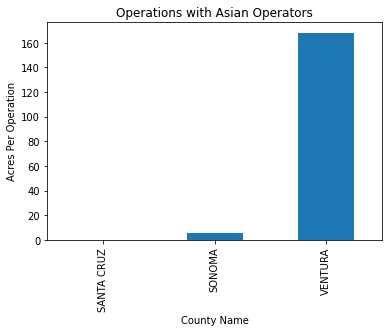

In [95]:
df_area_grown_operations_Asian = df_area_grown_operations[df_area_grown_operations['domaincat_desc'] == "OPERATORS: (RACE = ASIAN, ALONE OR COMBINED WITH OTHER RACES)"]
df_area_grown_operations_Asian_operations = df_area_grown_operations_Asian[df_area_grown_operations_Asian['unit_desc'] == "OPERATIONS"]
df_area_grown_operations_Asian_acres = df_area_grown_operations_Asian[df_area_grown_operations_Asian['unit_desc'] == "ACRES"]
df_area_grown_operations_Asian_operations_list = df_area_grown_operations_Asian_operations["Value"].to_list()
df_area_grown_operations_Asian_acres_list = df_area_grown_operations_Asian_acres["Value"].to_list()
dividedby = []
for x in range(3):
  dividedby.append(df_area_grown_operations_Asian_acres_list[x]/df_area_grown_operations_Asian_operations_list[x])
df_area_grown_operations_Asian_operations["dividedby"] = dividedby
df_area_grown_operations_Asian_operations.plot.bar(x="county_name", y="dividedby", legend=False)
plt.title("Operations with Asian Operators")
plt.ylabel("Acres Per Operation")
plt.xlabel("County Name")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 0, 'County Name')

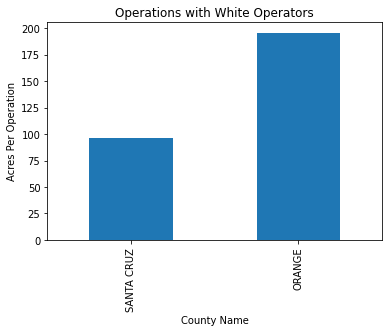

In [96]:
df_area_grown_operations_White = df_area_grown_operations[df_area_grown_operations['domaincat_desc'] == "OPERATORS: (RACE = WHITE, ALONE OR COMBINED WITH OTHER RACES)"]
df_area_grown_operations_White_operations = df_area_grown_operations_White[df_area_grown_operations_White['unit_desc'] == "OPERATIONS"]
df_area_grown_operations_White_acres = df_area_grown_operations_White[df_area_grown_operations_White['unit_desc'] == "ACRES"]
df_area_grown_operations_White_operations_list = df_area_grown_operations_White_operations["Value"].to_list()
df_area_grown_operations_White_acres_list = df_area_grown_operations_White_acres["Value"].to_list()
dividedby = []
for x in range(2):
  dividedby.append(df_area_grown_operations_White_acres_list[x]/df_area_grown_operations_White_operations_list[x])
df_area_grown_operations_White_operations["dividedby"] = dividedby
df_area_grown_operations_White_operations.plot.bar(x="county_name", y="dividedby", legend=False)
plt.title("Operations with White Operators")
plt.ylabel("Acres Per Operation")
plt.xlabel("County Name")

Text(0.5, 0, 'County Name')

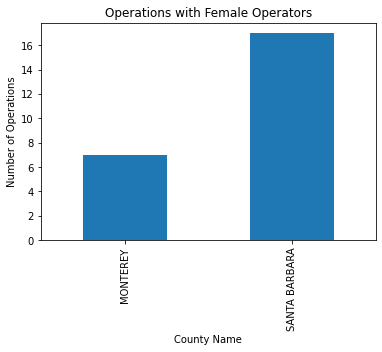

In [97]:
df_area_grown_operations = df_area_grown[df_area_grown['unit_desc'] == "OPERATIONS"]
df_area_grown_operations_Female = df_area_grown_operations[df_area_grown_operations['domaincat_desc'] == "OPERATORS, PRINCIPAL: (GENDER = FEMALE)"]
df_area_grown_operations_Female_operations = df_area_grown_operations_Female[df_area_grown_operations_Female['unit_desc'] == "OPERATIONS"]
df_area_grown_operations_Female_operations.plot.bar(x="county_name", y="Value", legend=False)
plt.title("Operations with Female Operators")
plt.ylabel("Number of Operations")
plt.xlabel("County Name")

##What are the most used chemical applications in Strawberry Fields in California?


Text(0, 0.5, 'Value')

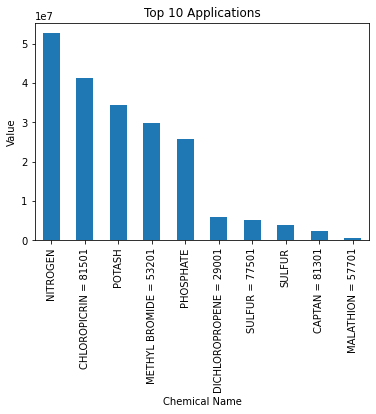

In [98]:
df_appplications_LB = df_appplications[df_appplications["Data Item"] == " MEASURED IN LB"]
df_appplications_LB = df_appplications_LB[df_appplications_LB["Chemical Name"] != "TOTAL"]
df_appplications_LB.groupby("Chemical Name")['Value'].sum().sort_values(ascending = False).head(10).plot.bar()
plt.title("Top 10 Applications")
plt.ylabel("Value")

##What is the climate like in the Top Producing County (Monterey) for Strawberries?

Growing Season for Strawberries is between February and November. We will only want to look at these months.


In [99]:
hold = df_Monterey["DATE"].str.split("-", n=1, expand=True)
hold = hold[hold[[1]].isin(["02","03", "04", "05", "06", "07", "08", "09", "10", "11"]).all(axis=1)]
hold[0] = hold[0] + "-" + hold[1]
df_Monterey_dated = df_Monterey[df_Monterey["DATE"].isin(hold[0].to_list())]

In [100]:
df_Monterey_dated

,DATE,STATION,LONGITUDE,ELEVATION,PRCP,LATITUDE,NAME,TMAX,TAVG,TMIN
0,2008-10,US1CAMT0003,-121.11736,360.0,4.3,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
1,2008-11,US1CAMT0003,-121.11736,360.0,13.9,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
4,2009-02,US1CAMT0003,-121.11736,360.0,115.1,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
5,2009-03,US1CAMT0003,-121.11736,360.0,34.1,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
6,2009-05,US1CAMT0003,-121.11736,360.0,3.8,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2416,2018-07,USW00023259,-121.84530,50.3,0.0,36.588100,"MONTEREY PENINSUL AIRPORT, CA US",20.83,16.95,13.06
2417,2018-08,USW00023259,-121.84530,50.3,0.0,36.588100,"MONTEREY PENINSUL AIRPORT, CA US",20.24,16.52,12.79
2418,2018-09,USW00023259,-121.84530,50.3,0.0,36.588100,"MONTEREY PENINSUL AIRPORT, CA US",19.54,15.66,11.77
2419,2018-10,USW00023259,-121.84530,50.3,4.6,36.588100,"MONTEREY PENINSUL AIRPORT, CA US",20.88,15.88,10.88


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Temperature in Degrees F')

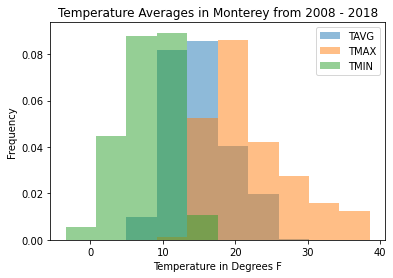

In [101]:
df_Monterey.groupby(["DATE", "NAME"])["TAVG", "TMAX", "TMIN"].mean().dropna().plot.hist(density=True,
        alpha=0.5,
        legend=True) ##Without Growing Season Filtered in
plt.title("Temperature Averages in Monterey from 2008 - 2018")
plt.xlabel("Temperature in Degrees F")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Temperature in Degrees F')

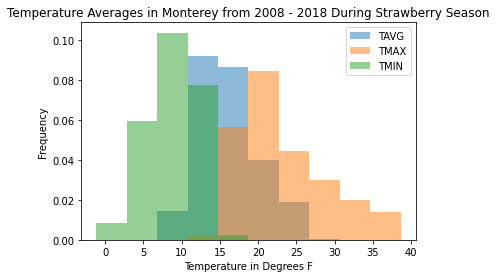

In [102]:
df_Monterey_dated.groupby(["DATE", "NAME"])["TAVG", "TMAX", "TMIN"].mean().dropna().plot.hist(density=True,
        alpha=0.5,
        legend=True) ##With Growing Season Filtered

plt.title("Temperature Averages in Monterey from 2008 - 2018 During Strawberry Season")
plt.xlabel("Temperature in Degrees F")

In [103]:
df_Monterey = df_Monterey.set_index("DATE")
df_Monterey = df_Monterey.dropna()

Text(0, 0.5, 'Inches')

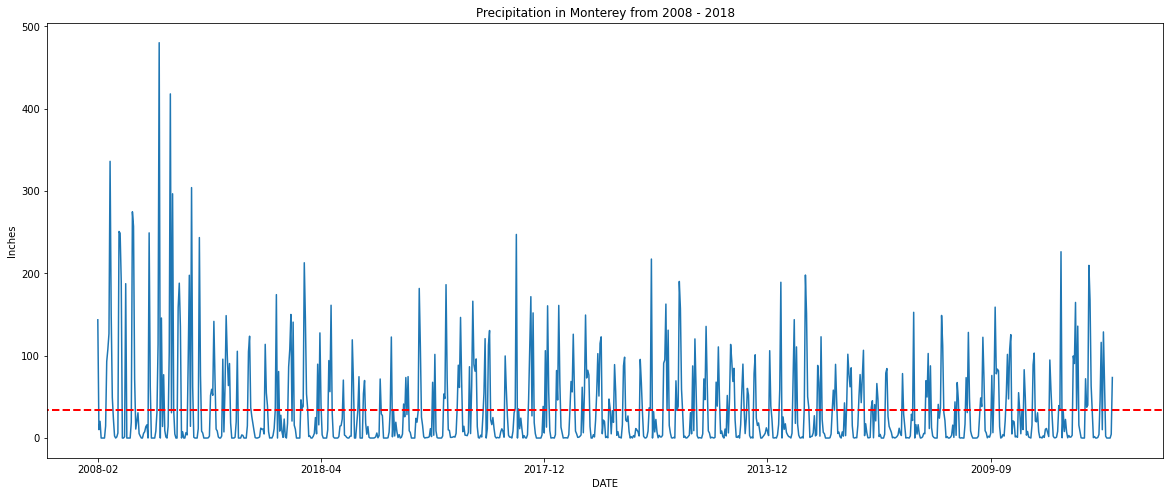

In [104]:
df_Monterey.PRCP.dropna().plot(figsize=(20,8))
plt.axhline(y=df_Monterey.PRCP.mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2, label=True)
plt.title("Precipitation in Monterey from 2008 - 2018")
plt.ylabel("Inches")

Text(0, 0.5, 'Inches')

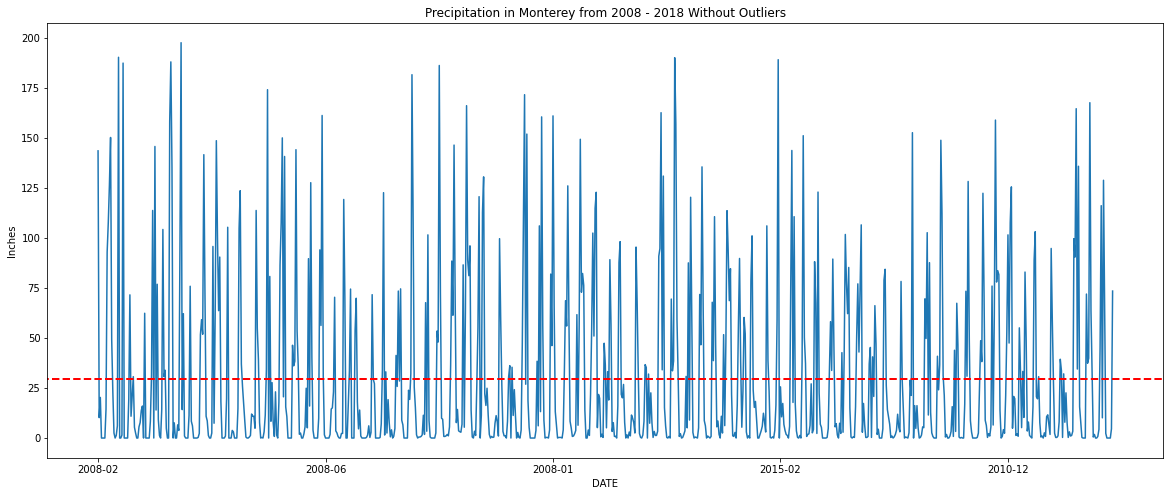

In [105]:
from scipy import stats
df_Monterey_NoOutlier = df_Monterey[(np.abs(stats.zscore(df_Monterey["PRCP"])) < 3)]
 #Removed Outliers from Dataset to get a better idea of where the average truly laid
df_Monterey_NoOutlier.PRCP.plot(figsize=(20,8))
plt.axhline(y=df_Monterey_NoOutlier.PRCP.mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2, label=True)
plt.title("Precipitation in Monterey from 2008 - 2018 Without Outliers")
plt.ylabel("Inches")

Text(0, 0.5, 'Inches')

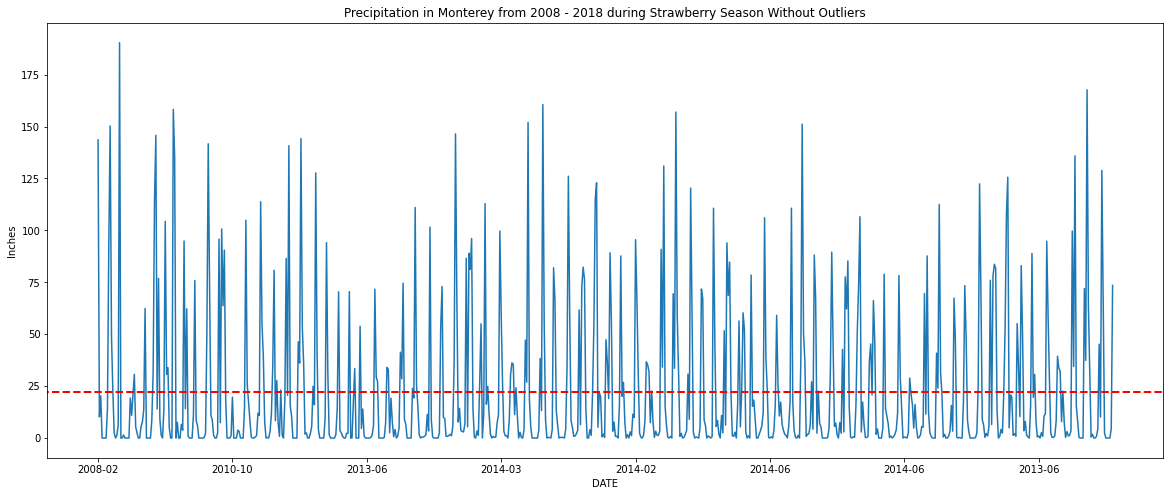

In [106]:
#Now want to look at what this average precipiation is during the growing season without Outliers

df_Monterey_dated_NoOutlier = df_Monterey_NoOutlier[df_Monterey_NoOutlier.index.isin(hold[0].to_list())]
df_Monterey_dated_NoOutlier.PRCP.plot(figsize=(20,8))
plt.axhline(y=df_Monterey_dated_NoOutlier.PRCP.mean(), xmin=-1, xmax=1, color='r', linestyle='--', lw=2, label=True)
plt.title("Precipitation in Monterey from 2008 - 2018 during Strawberry Season Without Outliers")
plt.ylabel("Inches")

###Time Series Linear Regression
- Unsure where to place this, but thought this was better than the Machine Learning File

Text(0, 0.5, 'Temperature in Degrees F')

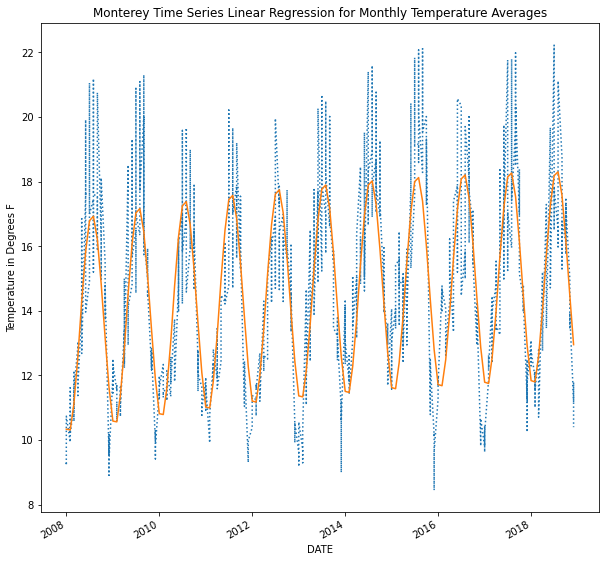

In [107]:
df_Monterey = pd.read_csv("https://www.dropbox.com/s/lexay02c3ijcz6c/df_Monterey.csv?dl=1")
df_Monterey.index = pd.to_datetime(df_Monterey["DATE"], format='%Y-%m')
df_Monterey = df_Monterey.dropna()
dateTime = df_Monterey.index
t = dateTime.year + (30 * (dateTime.month - 1) + dateTime.day) / 365
y_train = df_Monterey['TAVG']

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit linear regression on t, t^2, sin(2 pi t), cos(2 pi t)
pipeline = make_pipeline(
    make_union(
        PolynomialFeatures(degree=2, include_bias=False),
        FunctionTransformer(lambda t: np.sin(2 * np.pi * 1 * t)),
        FunctionTransformer(lambda t: np.cos(2 * np.pi * 1 * t))
    ),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line(figsize= (10,10))
plt.title("Monterey Time Series Linear Regression for Monthly Temperature Averages")
plt.ylabel("Temperature in Degrees F")

##Where did the weather data come from?


In [108]:
df_weather.head()

,DATE,STATION,LONGITUDE,ELEVATION,PRCP,LATITUDE,NAME,TMAX,TAVG,TMIN
0,2008-10,US1CAMT0003,-121.11736,360.0,4.3,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
1,2008-11,US1CAMT0003,-121.11736,360.0,13.9,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
2,2008-12,US1CAMT0003,-121.11736,360.0,30.6,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
3,2009-01,US1CAMT0003,-121.11736,360.0,29.5,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN
4,2009-02,US1CAMT0003,-121.11736,360.0,115.1,35.980762,"LOCKWOOD 3.6 NW, CA US",NaN,NaN,NaN


In [109]:
import descartes
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(77.91327405078444, 0.5, 'Latitude')

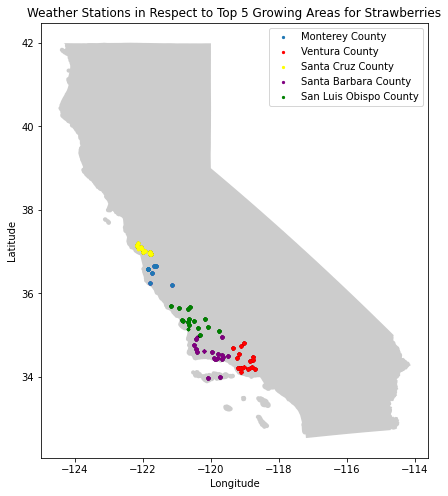

In [110]:
cali_map = gpd.read_file("CA_State_TIGER2016.shx").to_crs({'init': 'epsg:4326'})
geometry = [Point(xy) for xy in zip(df_Monterey['LONGITUDE'], df_Monterey['LATITUDE'])]
geo_df_Mont = gpd.GeoDataFrame(df_Monterey, geometry=geometry)
geometry = [Point(xy) for xy in zip(df_Ventura['LONGITUDE'], df_Ventura['LATITUDE'])]
geo_df_Vent = gpd.GeoDataFrame(df_Ventura, geometry=geometry)
geometry = [Point(xy) for xy in zip(df_SantaCruz['LONGITUDE'], df_SantaCruz['LATITUDE'])]
geo_df_SC = gpd.GeoDataFrame(df_SantaCruz, geometry=geometry)
geometry = [Point(xy) for xy in zip(df_SB['LONGITUDE'], df_SB['LATITUDE'])]
geo_df_SB = gpd.GeoDataFrame(df_SB, geometry=geometry)
geometry = [Point(xy) for xy in zip(df_SLO['LONGITUDE'], df_SLO['LATITUDE'])]
geo_df_SLO = gpd.GeoDataFrame(df_SLO, crs=crs, geometry=geometry)
fig,ax = plt.subplots(figsize=(8, 8))
cali_map.plot(ax =ax, alpha = 0.4, color='grey')
geo_df_Mont.plot(ax = ax, markersize=5, label="Monterey County")
geo_df_Vent.plot(ax = ax, color = "red", markersize=5, label="Ventura County")
geo_df_SC.plot(ax = ax, color = "yellow", markersize=5, label="Santa Cruz County")
geo_df_SB.plot(ax = ax, color = "purple", markersize=5, label="Santa Barbara County")
geo_df_SLO.plot(ax = ax, color = "green", markersize=5, label="San Luis Obispo County")
plt.legend()
plt.title("Weather Stations in Respect to Top 5 Growing Areas for Strawberries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")